In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('countryclusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


**selecting the feature**

In [ ]:
x = data.iloc[:,1:3] # 1st for rows and second for columns
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


**Clustering**

In [ ]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 2], dtype=int32)

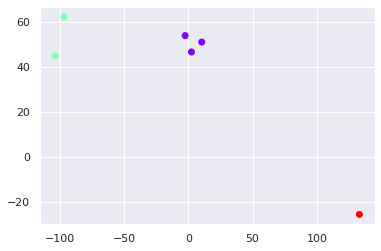

In [ ]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [ ]:
data_with_clusters['Clusters'] 

0    0
1    0
2    0
3    0
4    0
5    1
Name: Clusters, dtype: int32

Text(0, 0.5, 'WS')

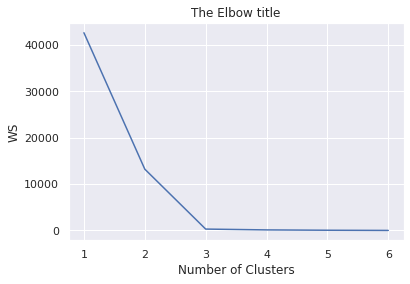

In [ ]:
ws=[]

for i  in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  ws_iter = kmeans.inertia_
  ws.append(ws_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,ws)
plt.title("The Elbow title")
plt.xlabel("Number of Clusters")

plt.ylabel('WS')